<a href="https://colab.research.google.com/github/marcinmichalsmolen/adam/blob/main/CIFAR10_MODELMAX_DOBRZE_50epok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sun Jun 18 00:03:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    30W /  70W |   4617MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

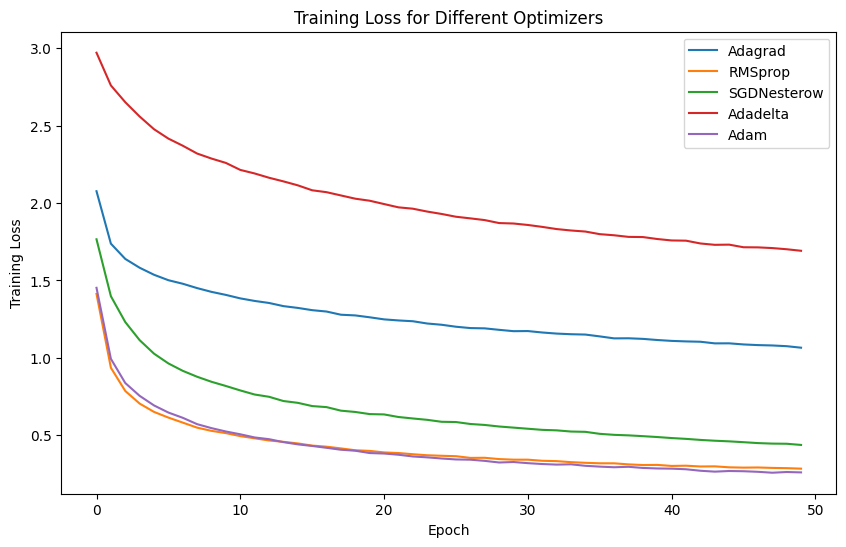

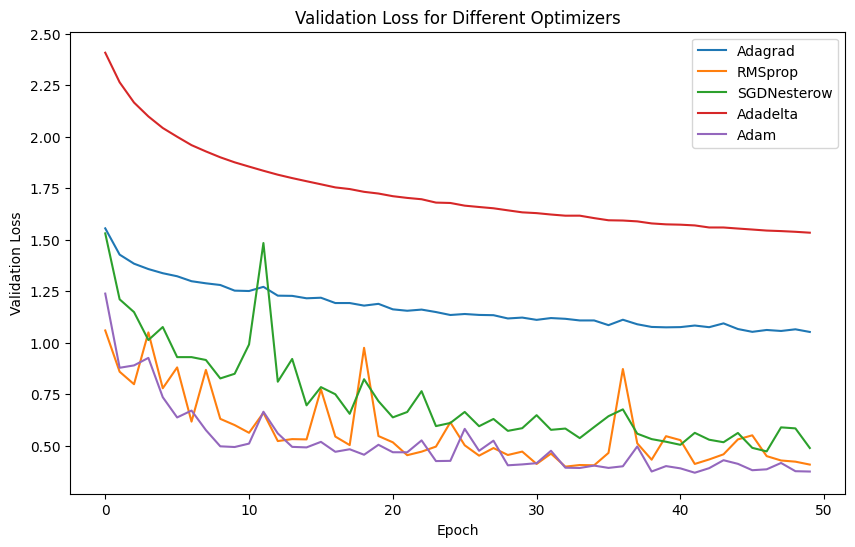

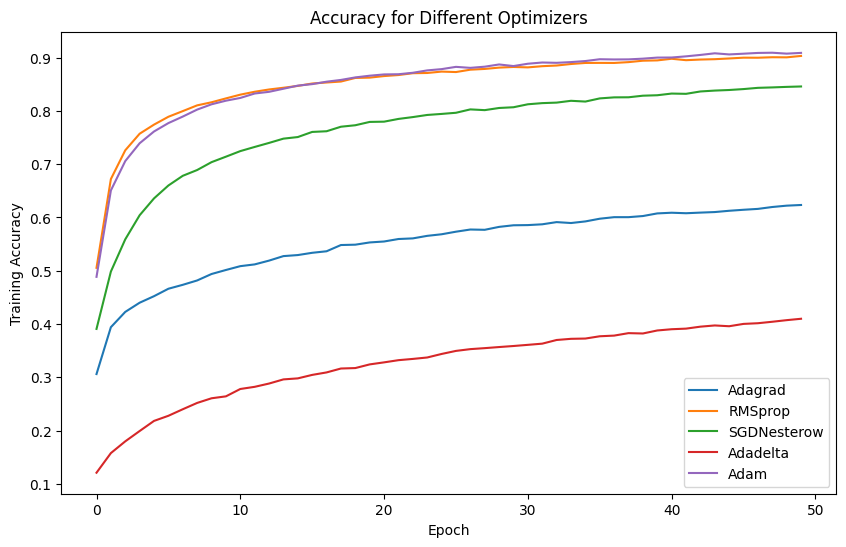

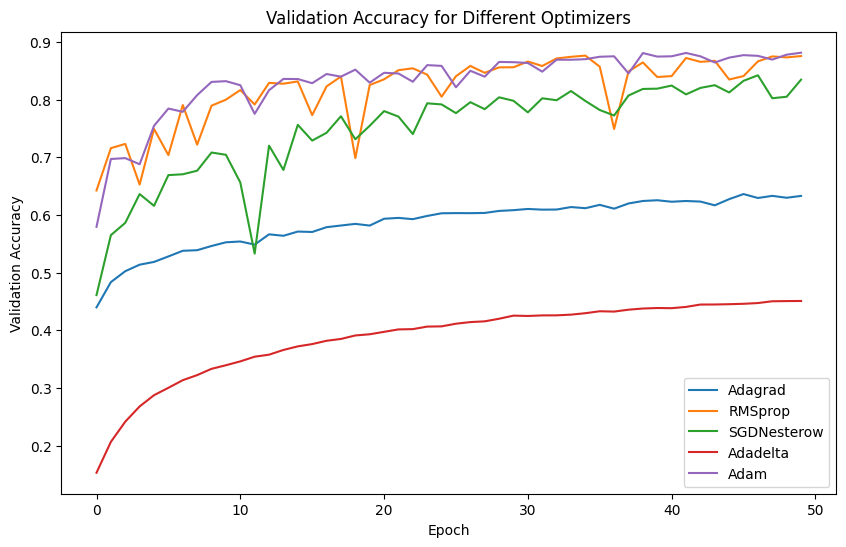

In [5]:
!nvidia-smi
import tensorflow as tf
import numpy as np
from keras.datasets import cifar10 as dataset
from keras.models import Sequential
from keras.layers import Dropout, MaxPooling2D, Dense, Flatten, Conv2D
from keras.layers import BatchNormalization, RandomZoom, RandomFlip
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
from keras.optimizers import Adagrad, RMSprop, SGD, Adadelta, Adam
import matplotlib.pyplot as plt

def load_data():
    (X_train, y_train), (X_test, y_test) = dataset.load_data()
    # Konwersja wektorów y_train i y_test do formatu one-hot
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return X_train, y_train, X_test, y_test

def normalize_pixels(tmp_train, tmp_test):
    # Zamiana na zmiennoprzecinkowe
    X_train = tmp_train.astype('float32')
    X_test = tmp_test.astype('float32')
    # Normalizacja
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    return X_train, X_test

X_train, y_train, X_test, y_test = load_data()
X_train, X_test = normalize_pixels(X_train, X_test)

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define model with dropout
def create_model():
    model = Sequential()
    model.add(RandomFlip("horizontal", input_shape=(32, 32, 3)))  # Zmiana wymiarów wejściowych
    model.add(RandomZoom(0.2, 0.2))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    return model

# Define training settings
batch_size = 64
epochs = 50
optimizer_names = ['Adagrad', 'RMSprop', 'SGDNesterow', 'Adadelta', 'Adam']
optimizers = [Adagrad(), RMSprop(), SGD(nesterov=True), Adadelta(), Adam()]

# Train models with different optimizers
history = {}
for optimizer_name, optimizer in zip(optimizer_names, optimizers):
    print(f'Training model with {optimizer_name} optimizer...')
    model = create_model()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    print(model.summary())
    history[optimizer_name] = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                                        verbose=0, validation_data=(X_test, y_test))
    train_accuracy = model.evaluate(X_train, y_train)
    test_accuracy = model.evaluate(X_test, y_test)
    print('Dokładności klasyfikacji na materiale treningowym  = ', train_accuracy)
    print('Dokładności klasyfikacji na materiale testowym  = ', test_accuracy)

# Plot training loss for all models on one graph
plt.figure(figsize=(10, 6))
for optimizer_name in optimizer_names:
    plt.plot(history[optimizer_name].history['loss'], label=optimizer_name)
plt.title('Training Loss for Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for optimizer_name in optimizer_names:
    plt.plot(history[optimizer_name].history['val_loss'], label=optimizer_name)
plt.title('Validation Loss for Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for optimizer_name in optimizer_names:
    plt.plot(history[optimizer_name].history['accuracy'], label=optimizer_name)
plt.title('Accuracy for Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for optimizer_name in optimizer_names:
    plt.plot(history[optimizer_name].history['val_accuracy'], label=optimizer_name)
plt.title('Validation Accuracy for Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()
